# Crime reported in Italy from 2011 to 2021

#### Data source:  https://www.istat.it/en/

Author: Maria Fisher 


In [1]:
import warnings 
warnings.filterwarnings("ignore")

import os
import pandas as pd
pd.options.display.float_format = "{:.2f}".format
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns 
import sklearn
from pivottablejs import pivot_ui



In [2]:
# read dataset
df = pd.read_csv('crimeItaly2011-2021.csv')

df.head()

,ITTER107,Territory,TIPO_DATO35,Data_type,REATI_PS,Type_of_crime,SEXISTAT1,Gender,ETA1,Age class,TIME,Select_time,Value
0,IT,Italy,OFFEND,number of alleged offenders reported by the po...,MASSMURD,mass murder,1,males,Y18-24,18-24 years,2011,2011,9
1,IT,Italy,OFFEND,number of alleged offenders reported by the po...,MASSMURD,mass murder,1,males,Y18-24,18-24 years,2012,2012,1
2,IT,Italy,OFFEND,number of alleged offenders reported by the po...,MASSMURD,mass murder,1,males,Y18-24,18-24 years,2013,2013,2
3,IT,Italy,OFFEND,number of alleged offenders reported by the po...,MASSMURD,mass murder,1,males,Y18-24,18-24 years,2014,2014,1
4,IT,Italy,OFFEND,number of alleged offenders reported by the po...,MASSMURD,mass murder,1,males,Y18-24,18-24 years,2015,2015,3


In [3]:
# drop columns

df = df.drop(columns=['ITTER107','Data_type','REATI_PS', 'SEXISTAT1', 'Age class','Select_time'])
df

,Territory,TIPO_DATO35,Type_of_crime,Gender,ETA1,TIME,Value
0,Italy,OFFEND,mass murder,males,Y18-24,2011,9
1,Italy,OFFEND,mass murder,males,Y18-24,2012,1
2,Italy,OFFEND,mass murder,males,Y18-24,2013,2
3,Italy,OFFEND,mass murder,males,Y18-24,2014,1
4,Italy,OFFEND,mass murder,males,Y18-24,2015,3
...,...,...,...,...,...,...,...
500467,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2017,1
500468,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2018,0
500469,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2019,0
500470,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2020,0


In [4]:
# rename columns 

df = df.rename(columns={'TIPO_DATO35': 'Type_of_data', 'ETA1': 'Age', 'TIME':'Year', 'Value':'N_crime_reported'})
df 

,Territory,Type_of_data,Type_of_crime,Gender,Age,Year,N_crime_reported
0,Italy,OFFEND,mass murder,males,Y18-24,2011,9
1,Italy,OFFEND,mass murder,males,Y18-24,2012,1
2,Italy,OFFEND,mass murder,males,Y18-24,2013,2
3,Italy,OFFEND,mass murder,males,Y18-24,2014,1
4,Italy,OFFEND,mass murder,males,Y18-24,2015,3
...,...,...,...,...,...,...,...
500467,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2017,1
500468,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2018,0
500469,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2019,0
500470,Sardegna,VICTIM,damage followed by arson,females,Y_UN13,2020,0


In [5]:
# check list of crime type in dataset
df.Type_of_crime.unique()

array(['mass murder', 'intentional homicides',
       'homicides for theft or robbery', 'homicides of mafia',
       'terrorist homicides', 'attempted homicides', 'infanticides',
       'manslaughter', 'unintentional homicides',
       'homicides from road accident', 'blows', 'culpable injuries',
       'menaces', 'stalking', 'kidnappings', 'offences', 'rapes',
       'sexual activity with a minor', 'corruption of a minor',
       'exploitation and abetting prostitution', 'child pornography ',
       'thefts', 'bag-snatching', 'pickpocketing', 'burglary',
       'shoplifting', 'theft from vehicle', 'theft of art objets',
       'theft of cargo trucks carrying freights', 'moped theft',
       'motorcycle theft', 'car theft', 'robberies', 'house robbery',
       'bank robbery', 'post office robbery', 'shop robbery',
       'street robbery', 'extortions', 'swindles and cyber frauds',
       'cybercrime', 'counteractions of goods and industrial products',
       'intellectual property viol

In [6]:
df.Age.unique()

array(['Y18-24', 'Y35-44', 'Y25-34', 'Y45-54', 'Y55-64', 'Y_GE65',
       'TOTAL', 'Y14-17', 'Y_UN13'], dtype=object)

In [7]:
# drop variable (row) total (total crime reported by the police to the justice system) to avoid confusion 

df.drop(df.index[(df["Type_of_crime"] == "total")],axis=0,inplace=True)



In [8]:
df.Type_of_crime.unique()

array(['mass murder', 'intentional homicides',
       'homicides for theft or robbery', 'homicides of mafia',
       'terrorist homicides', 'attempted homicides', 'infanticides',
       'manslaughter', 'unintentional homicides',
       'homicides from road accident', 'blows', 'culpable injuries',
       'menaces', 'stalking', 'kidnappings', 'offences', 'rapes',
       'sexual activity with a minor', 'corruption of a minor',
       'exploitation and abetting prostitution', 'child pornography ',
       'thefts', 'bag-snatching', 'pickpocketing', 'burglary',
       'shoplifting', 'theft from vehicle', 'theft of art objets',
       'theft of cargo trucks carrying freights', 'moped theft',
       'motorcycle theft', 'car theft', 'robberies', 'house robbery',
       'bank robbery', 'post office robbery', 'shop robbery',
       'street robbery', 'extortions', 'swindles and cyber frauds',
       'cybercrime', 'counteractions of goods and industrial products',
       'intellectual property viol

In [9]:
df.to_csv('ITcrime_clean.csv')

In [10]:
# check dataset structure 

print('Rows:\t{}'.format(df.shape[0]))
print('Variables:\t{}'.format(df.shape[1]))
df.dtypes


Rows:	494928
Variables:	7


Territory           object
Type_of_data        object
Type_of_crime       object
Gender              object
Age                 object
Year                 int64
N_crime_reported     int64
dtype: object

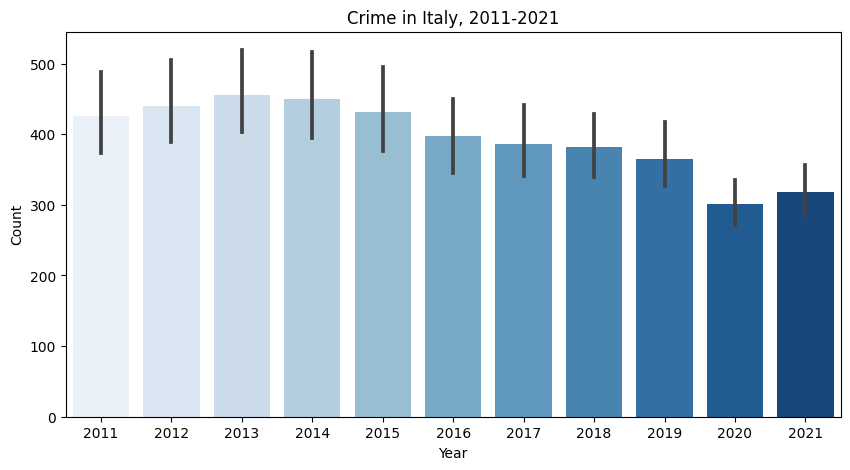

In [11]:
# plot graph of dataset 

plt.figure(figsize= (10,5))
sns.barplot(x= 'Year',y = 'N_crime_reported',data = df,palette='Blues')
plt.title('Crime in Italy, 2011-2021')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [12]:
# list all cities 

df.Territory.unique()

array(['Italy', 'Nord-ovest', 'Piemonte',
       "Valle d'Aosta / Vallée d'Aoste", 'Liguria', 'Lombardia',
       'Nord-est', 'Trentino Alto Adige / Südtirol',
       'Provincia Autonoma Bolzano / Bozen', 'Provincia Autonoma Trento',
       'Veneto', 'Friuli-Venezia Giulia', 'Emilia-Romagna', 'Centro (I)',
       'Toscana', 'Umbria', 'Marche', 'Lazio', 'Sud', 'Abruzzo', 'Molise',
       'Campania', 'Puglia', 'Basilicata', 'Calabria', 'Isole', 'Sicilia',
       'Sardegna'], dtype=object)

# Separating dataset into Victim from Offenders 

I am separating the dataset into two parts, Victims and Offenders to look at age, gender and location variables for each group. 

## Victims

In [13]:
# group data by victims

victim= df.apply(lambda row: row[df['Type_of_data'].isin(['VICTIM'])])
victim.head()

,Territory,Type_of_data,Type_of_crime,Gender,Age,Year,N_crime_reported
33,Italy,VICTIM,intentional homicides,males,Y18-24,2011,41
34,Italy,VICTIM,intentional homicides,males,Y18-24,2012,34
35,Italy,VICTIM,intentional homicides,males,Y18-24,2013,37
36,Italy,VICTIM,intentional homicides,males,Y18-24,2014,21
37,Italy,VICTIM,intentional homicides,males,Y18-24,2015,27


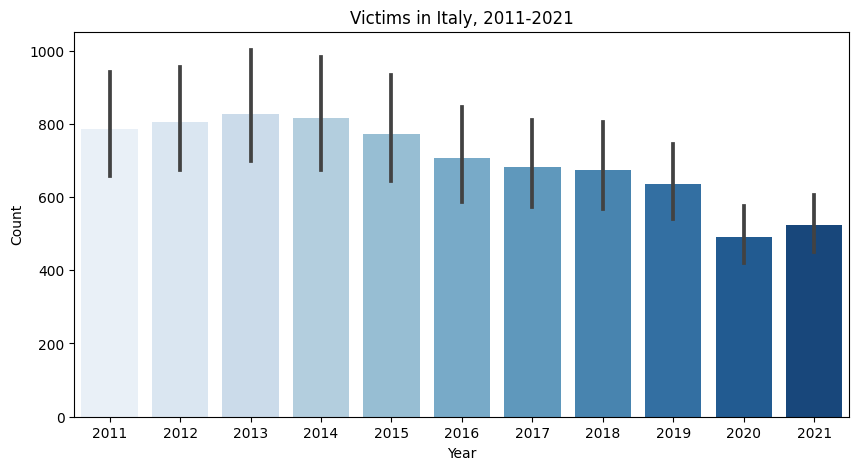

In [39]:
# plot graph of dataset 

plt.figure(figsize= (10,5))
sns.barplot(x= 'Year',y = 'N_crime_reported',data = victim,palette='Blues')
plt.title('Victims in Italy, 2011-2021')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Victim by region

In [15]:
# sum all crimes reported by region by victim

sum_victim_region = victim.groupby(by = victim.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(10)
sum_victim_region

,Territory,N_crime_reported
8,Italy,43510320
15,Nord-ovest,13817560
4,Centro (I),9635388
11,Lombardia,8513230
14,Nord-est,8331280
22,Sud,8007118
9,Lazio,5265124
5,Emilia-Romagna,4113000
16,Piemonte,3849870
7,Isole,3718974


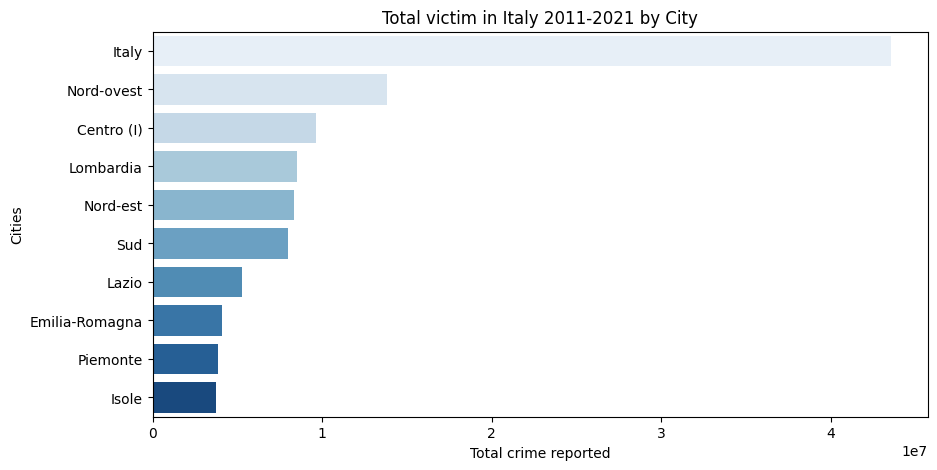

In [16]:
# plot graph of crimes by region by victim

plt.figure(figsize= (10,5))
sns.barplot(x=sum_victim_region['N_crime_reported'],y= sum_victim_region['Territory'], orient='h', palette='Blues');
plt.title('Total victim in Italy 2011-2021 by City')
plt.xlabel('Total crime reported')
plt.ylabel('Cities')
plt.show()

## Victim by gender 

In [19]:
# sum crimes reported by gender 
sum_victim_gender = victim.groupby(by = victim.Gender)['N_crime_reported','Gender'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(10)
sum_victim_gender

,Gender,N_crime_reported
1,males,75275886
0,females,55768324


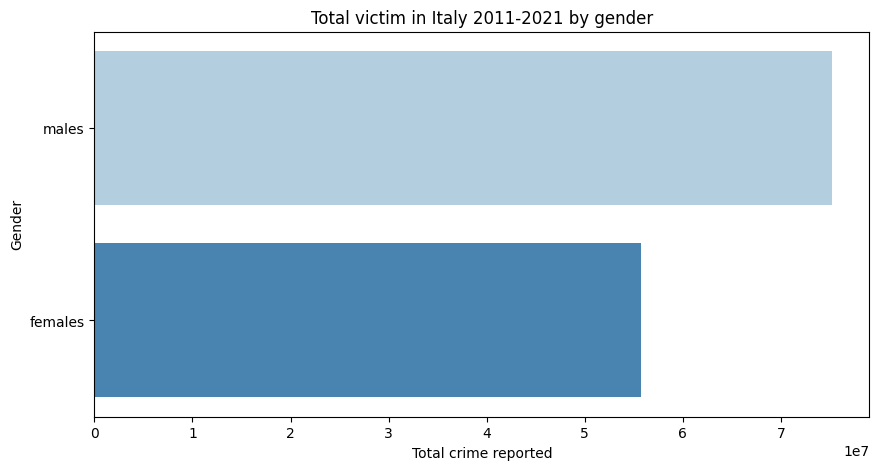

In [20]:
# graph of crimes reported by gender (Victims and offenders)
plt.figure(figsize= (10,5))
sns.barplot(x=sum_victim_gender['N_crime_reported'],y= sum_victim_gender['Gender'], orient='h', palette='Blues');
plt.title('Total victim in Italy 2011-2021 by gender')
plt.xlabel('Total crime reported')
plt.ylabel('Gender')
plt.show()

## Victim by age

In [23]:
# sum crimes reported by age range 

sum_victim_age = victim.groupby(by = victim.Age)['N_crime_reported','Age'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(10)
sum_victim_age

,Age,N_crime_reported
0,TOTAL,65522105
5,Y45-54,14061109
4,Y35-44,13234577
7,Y_GE65,11247469
3,Y25-34,10146564
6,Y55-64,10069992
2,Y18-24,5300356
1,Y14-17,1146679
8,Y_UN13,315359


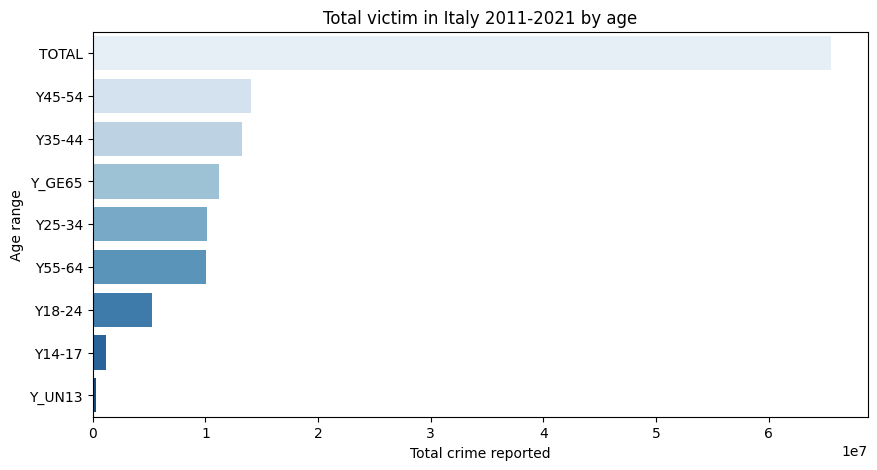

In [24]:
# graph of crime reported by age range 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_victim_age['N_crime_reported'],y= sum_victim_age['Age'], orient='h', palette='Blues');
plt.title('Total victim in Italy 2011-2021 by age')
plt.xlabel('Total crime reported')
plt.ylabel('Age range')
plt.show()

## Crime by type 

In [27]:
# sum all crimes by type across years 
sum_victim_crime_type = victim.groupby(by = victim.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_victim_crime_type


,Type_of_crime,N_crime_reported
31,thefts,75515726
10,damages,16357634
29,swindles and cyber frauds,10010552
22,pickpocketing,9199966
20,menaces,5099072
7,culpable injuries,3947334
21,offences,2041714
24,robberies,1819774
28,street robbery,1087262
2,bag-snatching,1013572


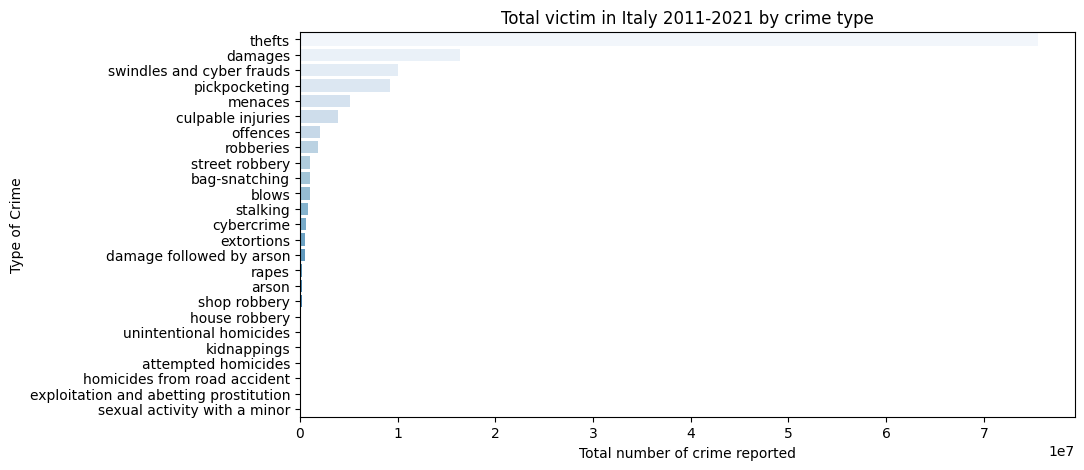

In [28]:
#  graph crimes by type across years 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_victim_crime_type['N_crime_reported'],y= sum_victim_crime_type['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total victim in Italy 2011-2021 by crime type')
plt.xlabel('Total number of crime reported')
plt.ylabel('Type of Crime')
plt.show()

## Offenders 

In [14]:
# group data by offender

offender = df.apply(lambda row: row[df['Type_of_data'].isin(['OFFEND'])])
offender.head()

,Territory,Type_of_data,Type_of_crime,Gender,Age,Year,N_crime_reported
0,Italy,OFFEND,mass murder,males,Y18-24,2011,9
1,Italy,OFFEND,mass murder,males,Y18-24,2012,1
2,Italy,OFFEND,mass murder,males,Y18-24,2013,2
3,Italy,OFFEND,mass murder,males,Y18-24,2014,1
4,Italy,OFFEND,mass murder,males,Y18-24,2015,3


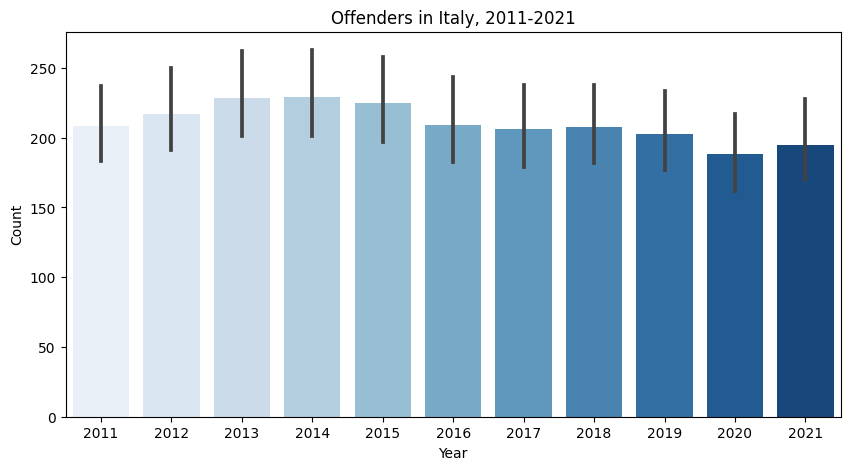

In [42]:
# plot graph of dataset 

plt.figure(figsize= (10,5))
sns.barplot(x= 'Year',y = 'N_crime_reported',data = offender,palette='Blues')
plt.title('Offenders in Italy, 2011-2021')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

## Offenders by region

In [17]:
# sum all crimes reported by region by victim

sum_offender_region = offender.groupby(by = offender.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(10)
sum_offender_region

,Territory,N_crime_reported
8,Italy,21556556
15,Nord-ovest,5514838
22,Sud,5170142
4,Centro (I),4421862
14,Nord-est,3888940
11,Lombardia,3207722
7,Isole,2560774
3,Campania,2133772
9,Lazio,2091228
21,Sicilia,2036066


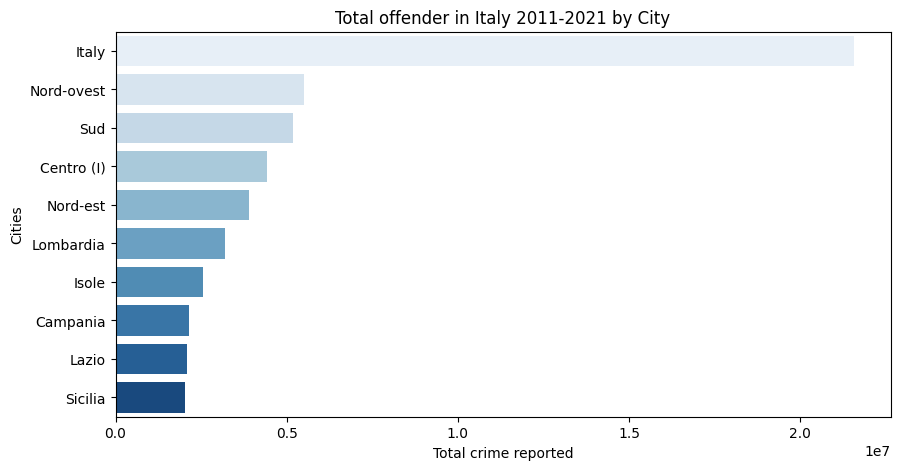

In [18]:
# plot graph of crimes by region by offenders

plt.figure(figsize= (10,5))
sns.barplot(x=sum_offender_region['N_crime_reported'],y= sum_offender_region['Territory'], orient='h', palette='Blues');
plt.title('Total offender in Italy 2011-2021 by City')
plt.xlabel('Total crime reported')
plt.ylabel('Cities')
plt.show()

## Offenders by gender

In [21]:
# sum crimes reported by gender 
sum_offender_gender = offender.groupby(by = offender.Gender)['N_crime_reported','Gender'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(10)
sum_offender_gender

,Gender,N_crime_reported
1,males,52787548
0,females,12204142


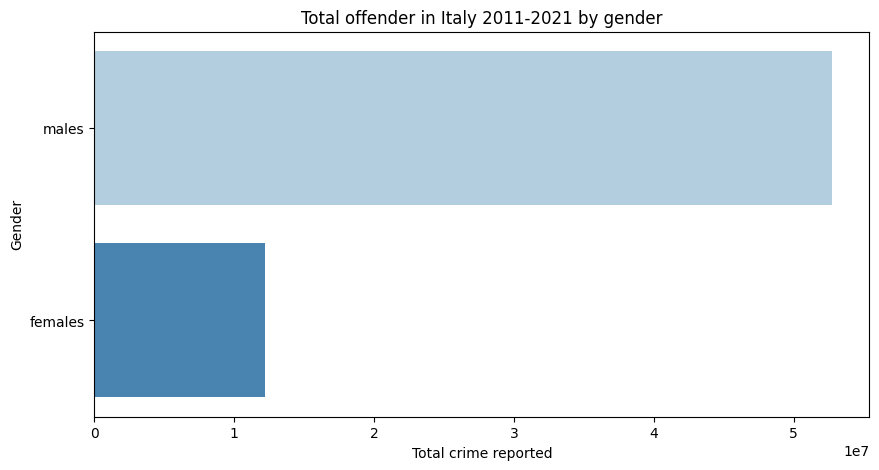

In [22]:
# graph of crimes reported by gender (Victims and offenders)
plt.figure(figsize= (10,5))
sns.barplot(x=sum_offender_gender['N_crime_reported'],y= sum_offender_gender['Gender'], orient='h', palette='Blues');
plt.title('Total offender in Italy 2011-2021 by gender')
plt.xlabel('Total crime reported')
plt.ylabel('Gender')
plt.show()

## Offenders by age

In [25]:
# sum crimes reported by age range 

sum_offender_age = offender.groupby(by = offender.Age)['N_crime_reported','Age'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(10)
sum_offender_age

,Age,N_crime_reported
0,TOTAL,32495845
3,Y25-34,8175588
4,Y35-44,7737499
5,Y45-54,5683255
2,Y18-24,5237888
6,Y55-64,2812437
7,Y_GE65,1542316
1,Y14-17,1228856
8,Y_UN13,78006


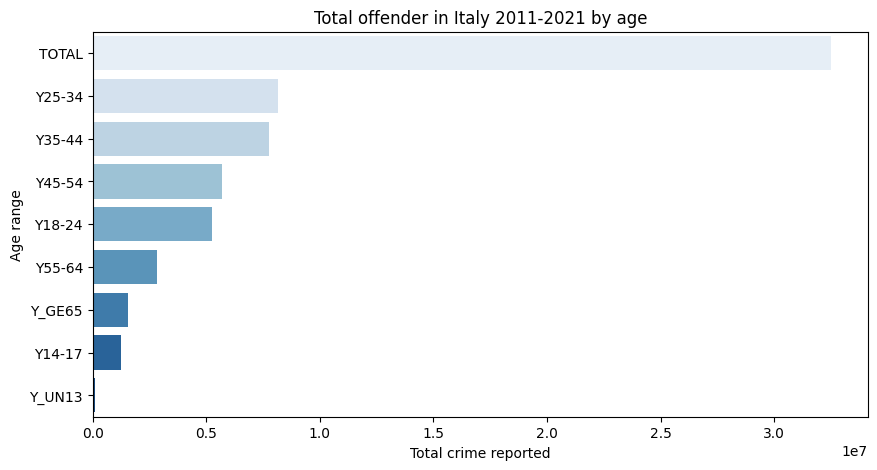

In [26]:
# graph of crime reported by age range 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_offender_age['N_crime_reported'],y= sum_offender_age['Age'], orient='h', palette='Blues');
plt.title('Total offender in Italy 2011-2021 by age')
plt.xlabel('Total crime reported')
plt.ylabel('Age range')
plt.show()

## Offenders by type of crime

In [29]:
# sum all crimes by type across years 
sum_offender_crime_type = offender.groupby(by = offender.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_offender_crime_type


,Type_of_crime,N_crime_reported
35,other crimes,24704196
52,thefts,7229774
53,trafficking and drugs possession,4424848
47,swindles and cyber frauds,4302140
30,menaces,3700086
12,culpable injuries,3510520
43,shoplifting,2084678
39,receiving stolen goods,1993784
15,damages,1799504
34,offences,1567206


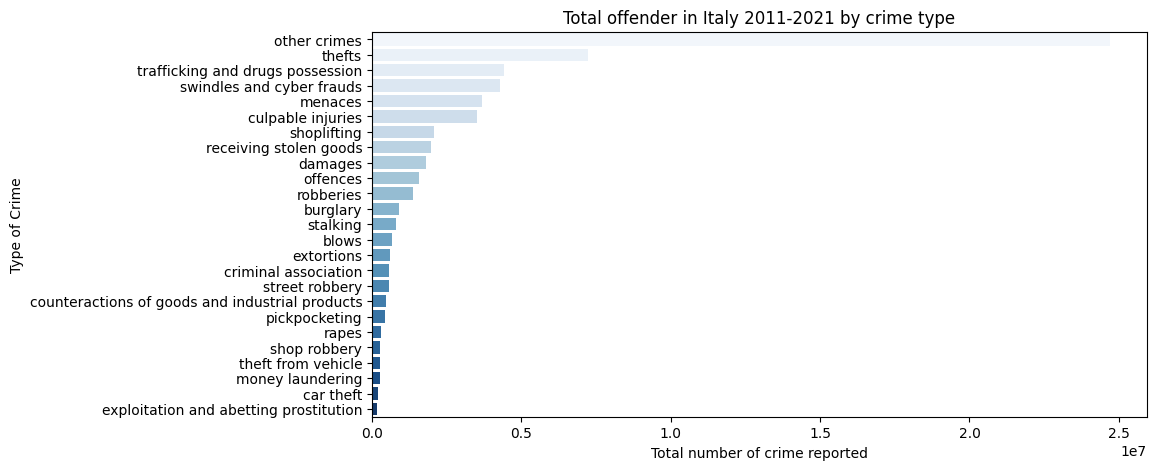

In [30]:
#  graph crimes by type across years 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_offender_crime_type['N_crime_reported'],y= sum_offender_crime_type['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total offender in Italy 2011-2021 by crime type')
plt.xlabel('Total number of crime reported')
plt.ylabel('Type of Crime')
plt.show()

# Subseting of the data into categories and grouping by type of crime

## Crime type : Sex abuse

In [31]:
# group data on sex crimes

crime_sex_abuse = df.apply(lambda row: row[df['Type_of_crime'].isin(['rapes','exploitation and abetting prostitution', 
                                                                                         'child pornography ','stalking',  'sexual activity with a minor', 
                                                                                         'corruption of a minor'])])
crime_sex_abuse.head()

,Territory,Type_of_data,Type_of_crime,Gender,Age,Year,N_crime_reported
528,Italy,OFFEND,stalking,males,Y18-24,2011,523
529,Italy,OFFEND,stalking,males,Y18-24,2012,518
530,Italy,OFFEND,stalking,males,Y18-24,2013,751
531,Italy,OFFEND,stalking,males,Y18-24,2014,709
532,Italy,OFFEND,stalking,males,Y18-24,2015,680


In [32]:
# sum sex crimes 
sum_crime_sex = crime_sex_abuse.groupby(by = crime_sex_abuse.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_sex

,Territory,N_crime_reported
8,Italy,869984
15,Nord-ovest,213742
22,Sud,213308
4,Centro (I),172334
14,Nord-est,155954
11,Lombardia,129148
7,Isole,114646
21,Sicilia,91086
3,Campania,87054
9,Lazio,85112


In [33]:
# remove the the row Italy with values for the whole contry to perform stats
sex_abuse = sum_crime_sex.loc[sum_crime_sex["Territory"] != 'Italy']
sex_abuse

,Territory,N_crime_reported
15,Nord-ovest,213742
22,Sud,213308
4,Centro (I),172334
14,Nord-est,155954
11,Lombardia,129148
7,Isole,114646
21,Sicilia,91086
3,Campania,87054
9,Lazio,85112
5,Emilia-Romagna,69442


In [34]:
# stats
sex_abuse.describe()

,N_crime_reported
count,24.00
mean,72578.17
std,63780.51
min,7554.00
25%,19230.50
50%,57030.00
75%,96976.00
max,213742.00


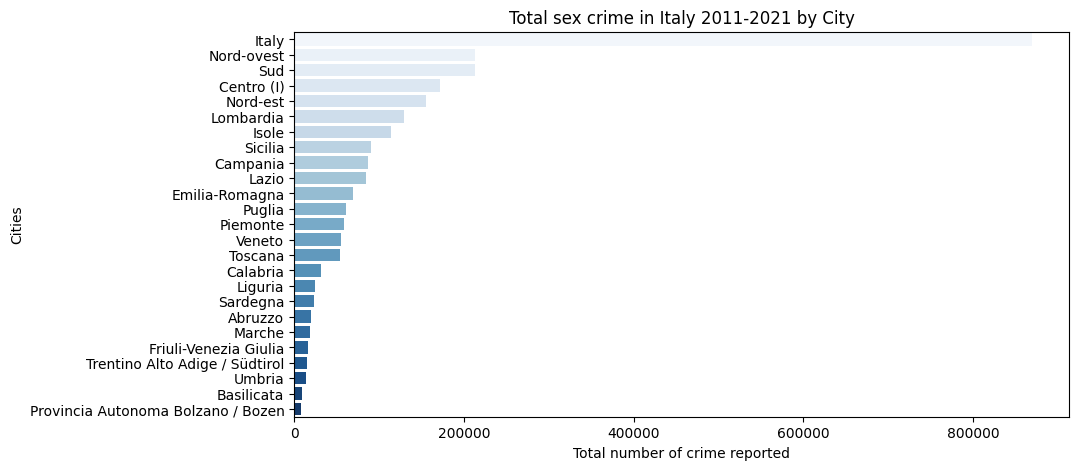

In [35]:
# graph of sex crimes by region 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_sex['N_crime_reported'],y= sum_crime_sex['Territory'], orient='h', palette='Blues');
plt.title('Total sex crime in Italy 2011-2021 by City')
plt.xlabel('Total number of crime reported')
plt.ylabel('Cities')
plt.show()

In [36]:
# sex crimes by type
sex_crime = crime_sex_abuse.groupby(by = crime_sex_abuse.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sex_crime

,Type_of_crime,N_crime_reported
5,stalking,1678660
3,rapes,573930
2,exploitation and abetting prostitution,202484
0,child pornography,81160
4,sexual activity with a minor,69166
1,corruption of a minor,19286


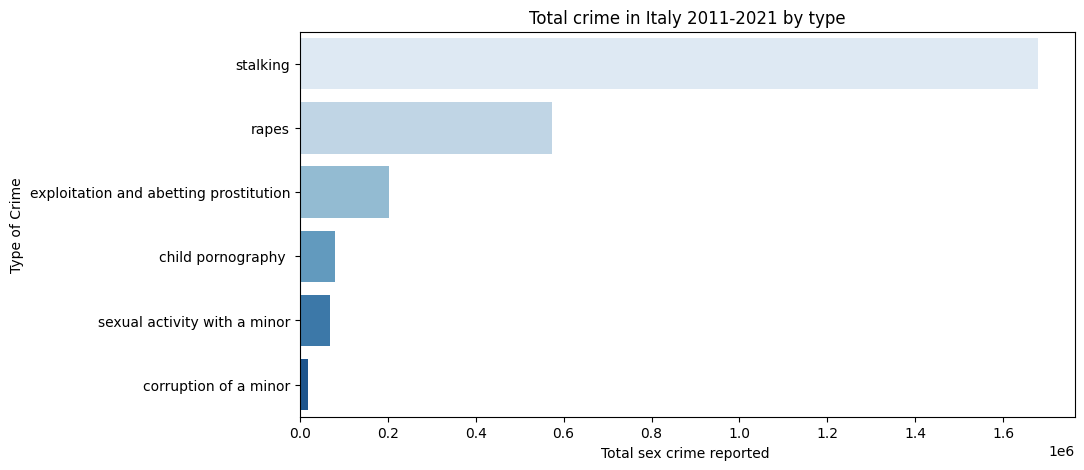

In [37]:
#graph of sex crimes by type

plt.figure(figsize= (10,5))
sns.barplot(x=sex_crime['N_crime_reported'],y= sex_crime['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total crime in Italy 2011-2021 by type')
plt.xlabel('Total sex crime reported ')
plt.ylabel('Type of Crime')
plt.show()

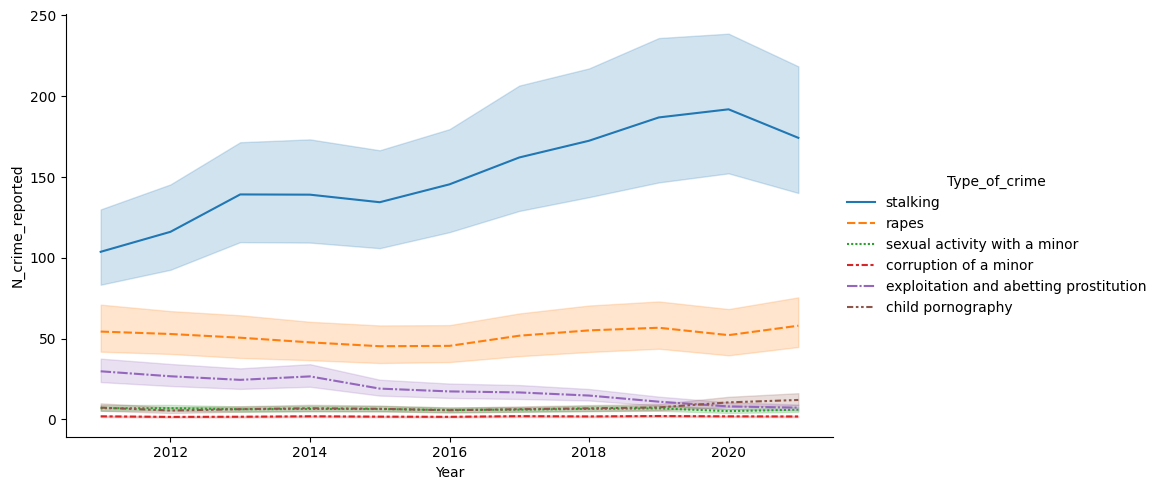

In [38]:
#Sexual crime by year
crime_sex = sns.relplot(kind='line', data=crime_sex_abuse, x='Year', y='N_crime_reported', hue='Type_of_crime', style='Type_of_crime', aspect=1.75)


In [ ]:
# graph of all crimes 

plt.figure(figsize=(10,5))
df['Type_of_crime'].value_counts().plot.bar()
plt.title('Type of crime')
plt.ylabel('Total number of crimes')
plt.show()

## Crime type : Murder

In [ ]:
#  group data on muder

crime_murder = df.apply(lambda row: row[df['Type_of_crime'].isin(['mass murder', 'intentional homicides',
       'homicides for theft or robbery', 'homicides of mafia', 'terrorist homicides', 'attempted homicides',
        'infanticides', 'manslaughter', 'unintentional homicides', 'homicides from road accident'])])
crime_murder.head()

In [ ]:
# sum murder
sum_crime_murder = crime_murder.groupby(by = crime_murder.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_murder

In [ ]:
# remove the the row Italy with values for the whole contry to perform stats
stats_murder = sum_crime_murder.loc[sum_crime_murder["Territory"] != 'Italy']
stats_murder

In [ ]:
# stats

stats_murder.describe()

In [ ]:
# plog graph of total muder reposted by region

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_murder['N_crime_reported'],y= sum_crime_murder['Territory'], orient='h', palette='Blues');
plt.title('Total murder in Italy 2011-2021 by City')
plt.xlabel('Total murder reported')
plt.ylabel('Cities')
plt.show()

In [ ]:
# muder by type
murder = crime_murder.groupby(by = crime_murder.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
murder

In [ ]:
# graph of muder by type

plt.figure(figsize= (10,5))
sns.barplot(x=murder['N_crime_reported'],y= murder['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total murder in Italy 2011-2021 by type')
plt.xlabel('Total murder reported')
plt.ylabel('Type of murder')
plt.show()

In [ ]:
# Murder by year
murder = sns.relplot(kind='line', data=crime_murder, x='Year', y='N_crime_reported', hue='Type_of_crime', style='Type_of_crime', aspect=1.75)


## Crime type : Robery

In [ ]:
# group data by robery 

crime_robery = df.apply(lambda row: row[df['Type_of_crime'].isin(['thefts', 'bag-snatching', 'pickpocketing', 
       'burglary','shoplifting', 'theft from vehicle', 'theft of art objets', 'car theft', 'robberies',
       'theft of cargo trucks carrying freights', 'moped theft','motorcycle theft', 'house robbery',
       'bank robbery', 'post office robbery', 'shop robbery', 'street robbery', ])])
crime_robery.head()

In [ ]:
# sum robery reported by region

sum_crime_robery = crime_robery.groupby(by = crime_robery.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_robery

In [ ]:
# remove the the row Italy with values for the whole contry to perform stats
stats_robery = sum_crime_robery.loc[sum_crime_robery["Territory"] != 'Italy']
stats_robery

In [ ]:
# stats

stats_robery.describe()

In [ ]:
# plot graph of total number of robery by region 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_robery['N_crime_reported'],y= sum_crime_robery['Territory'], orient='h', palette='Blues');
plt.title('Total robery in Italy 2011-2021 by City')
plt.xlabel('Total number of robery reported')
plt.ylabel('Cities')
plt.show()

In [ ]:
# sum robery by type

robery = crime_robery.groupby(by = crime_robery.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
robery

In [ ]:
# plot graph of robery by type

plt.figure(figsize= (10,5))
sns.barplot(x=robery['N_crime_reported'],y= robery['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total robery in Italy 2011-2021 by type')
plt.xlabel('Total number of robery reported')
plt.ylabel('Type of robery')
plt.show()

In [ ]:
robery = sns.relplot(kind='line', data=crime_robery, x='Year', y='N_crime_reported', hue='Type_of_crime', style='Type_of_crime', aspect=1.75)


## Crime type : Fraud

In [ ]:
crime_fraud = df.apply(lambda row: row[df['Type_of_crime'].isin(['extortions', 'swindles and cyber frauds',
       'cybercrime', 'counteractions of goods and industrial products','intellectual property violations',
       'receiving stolen goods','money laundering', 'usury'])])
crime_fraud.head()

In [ ]:
sum_crime_fraud = crime_fraud.groupby(by = crime_fraud.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_fraud

In [ ]:
# remove the the row Italy with values for the whole contry to perform stats
stats_fraud = sum_crime_fraud.loc[sum_crime_fraud["Territory"] != 'Italy']
stats_fraud

In [ ]:
# stats

stats_fraud.describe()

In [ ]:
# plot graph total fraud reported by region

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_fraud['N_crime_reported'],y= sum_crime_fraud['Territory'], orient='h', palette='Blues');
plt.title('Total fraud in Italy 2011-2021 by City')
plt.xlabel('Total number of fraud reported')
plt.ylabel('Cities')
plt.show()

In [ ]:
# sum fraud by type

fraud = crime_fraud.groupby(by = crime_fraud.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
fraud

In [ ]:
# plot graph fraud by type

plt.figure(figsize= (10,5))
sns.barplot(x=fraud['N_crime_reported'],y= fraud['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total fraud in Italy 2011-2021 by type')
plt.xlabel('Total number of fraud reported')
plt.ylabel('Type of fraud')
plt.show()

In [ ]:
fraud = sns.relplot(kind='line', data=crime_fraud, x='Year', y='N_crime_reported', hue='Type_of_crime', style='Type_of_crime', aspect=1.75)


## Crime type : Others

In [ ]:
# group data on any other crime reported 

crime_others = df.apply(lambda row: row[df['Type_of_crime'].isin(['damages', 'arson', 'forest arson',
       'damage followed by arson', 'trafficking and drugs possession','attacks', 'criminal association', 
       'mafia criminal association', 'smuggling', 'other crimes'])])
crime_others.head()

In [ ]:
 # sum any other crime reported 

sum_crime_others = crime_others.groupby(by = crime_others.Territory)['N_crime_reported','Territory'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
sum_crime_others

In [ ]:
# remove the the row Italy with values for the whole contry to perform stats
stats_othercrimes = sum_crime_others.loc[sum_crime_others["Territory"] != 'Italy']
stats_othercrimes

In [ ]:
# stats

stats_othercrimes.describe()

In [ ]:
#  plot graph of other crime reported 

plt.figure(figsize= (10,5))
sns.barplot(x=sum_crime_others['N_crime_reported'],y= sum_crime_others['Territory'], orient='h', palette='Blues');
plt.title('Total other crime in Italy 2011-2021 by City')
plt.xlabel('Total number of crime reported')
plt.ylabel('Cities')
plt.show()

In [ ]:
# sum other crimes by type 

others = crime_others.groupby(by = crime_others.Type_of_crime)['N_crime_reported','Type_of_crime'].sum().reset_index().sort_values(by = 'N_crime_reported', ascending = False).head(25)
others

In [ ]:
# plot graph of other crimes by type 

plt.figure(figsize= (10,5))
sns.barplot(x=others['N_crime_reported'],y= others['Type_of_crime'], orient='h', palette='Blues');
plt.title('Total others in Italy 2011-2021 by type')
plt.xlabel('Total number of other crime reported')
plt.ylabel('Type of crime')
plt.show()

In [ ]:
others = sns.relplot(kind='line', data=crime_others, x='Year', y='N_crime_reported', hue='Type_of_crime', style='Type_of_crime', aspect=1.75)


In [ ]:
# transform the dataframe using pivot table  

p_table = pd.pivot_table(df, index = ['Territory','Gender', 'Type_of_data', 'Age', 'Year'],
                             columns= 'Type_of_crime',
                             values= 'N_crime_reported')
p_table

In [ ]:
# fill na with 0

df2 = p_table.fillna(0)
df2

In [ ]:
# save data for further use 

df2.to_csv('ITcrime_pivot_table.csv')

## Interactive panel
#pip install pivottablejs

With interactive panel, it is possible to evaluate all variables and perform stats (Average, Median, Sum, Variance, Deviation, Lower and Upper bound, etc). 


In [ ]:
# call interactive panel 

pivot_ui(df2)

#### References


https://pivottable.js.org/examples/